In [ ]:
#hide
%reload_ext autoreload
%autoreload 2
# from nbdev.showdoc import *
# from fastcore.test import *

In [ ]:
#hide
#export
import point_to_box.utils as utils
import point_to_box.data as ptb_data
import point_to_box.model as ptb_model

In [ ]:
#hide
from fastai.vision.all import *
from fastai.data.core import DataLoaders

# from torch.utils.data import DataLoader
from torchvision import transforms
from pycocotools.coco import COCO
# from matplotlib.patches import Polygon
from shapely.geometry import Polygon, Point

In [ ]:
#hide
# temp
import skimage.io as io
import random

In [ ]:
#hide
SRC = Path('../../data/val2017/')
DST = Path('../../converted_data')
ANNOS = 'train_individual_'+'instances_val2017.json'

In [ ]:
ANNOS

'train_individual_instances_val2017.json'

In [ ]:
type(DST/'train')

pathlib.PosixPath

In [ ]:
timgs, tcntrs, tboxs, ids = get_annotations_cust(DST/'train'/ANNOS)
# timgs : list of image filenames
# tbox  : list of bbox lists

In [ ]:
timgs[0]

'img_29225_anno_29225_person_.jpg'

In [ ]:
tboxs[0]

([[37, 66, 76, 181]], ['person'])

In [ ]:
img = load_image(DST/'train'/timgs[0])
img.show()

In [ ]:
img2bbox = dict(zip(timgs, tboxs))

In [ ]:
img2bbox['img_29225_anno_29225_person_.jpg'][0]

[[37, 66, 76, 181]]

In [ ]:
tdblock = DataBlock(
    blocks = (ImageBlock, BBoxBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(),
#     get_y=[lambda o: img2bbox[o.name][0], noop()], #lambda o: img2bbox[o.name][1]
#     n_inp=1,
    get_y=lambda o: img2bbox[o.name][0],
#     splitter = GrandparentSplitter('train','val'),

#     item_tfms = Resize(500),
#     batch_tfms = aug_transforms()
)

In [ ]:
dls = tdblock.dataloaders(DST/'train', bs = 16, verbose = True)

Found 29794 items
2 datasets of sizes 23836,5958
Setting up Pipeline: PILBase.create
Setting up Pipeline: <lambda> -> TensorBBox.create
Setting up after_item: Pipeline: PointScaler -> ToTensor
Setting up before_batch: Pipeline: bb_pad
Setting up after_batch: Pipeline: IntToFloatTensor -- {'div': 255.0, 'div_mask': 1}


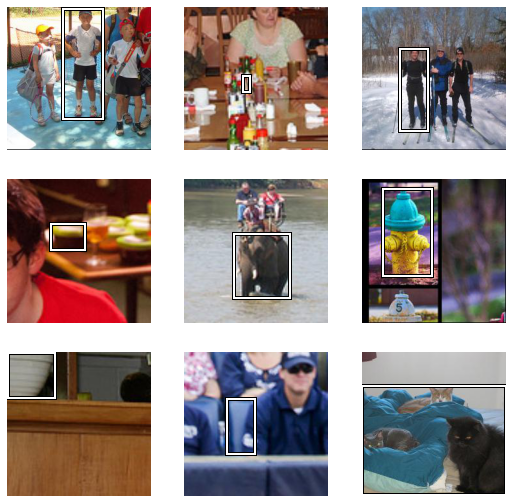

In [ ]:
dls.show_batch()

In [ ]:
len(tfm)

29794

In [ ]:
tfm = ptb_data.PTBTransform(root = DST/'train',
                   annos = DST/'train'/ANNOS)

[autoreload of point_to_box.data failed: Traceback (most recent call last):
  File "/Users/constantinbaumgartner/Desktop/EfficientLoc/eff_loc/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/constantinbaumgartner/Desktop/EfficientLoc/eff_loc/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/constantinbaumgartner/Desktop/EfficientLoc/eff_loc/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/Users/constantinbaumgartner/Desktop/EfficientLoc/eff_loc/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 317, in update_class
    update_instances(old, new)
  File "/Users/constantinbaumgartner/Desktop/EfficientLoc/eff_loc/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 280, in update_instances
    ref.__class__ = n

loading annotations into memory...
Done (t=0.18s)
creating index...
index created!


In [ ]:
tls = TfmdLists(range(len(tfm)), tfm)

[autoreload of point_to_box.data failed: Traceback (most recent call last):
  File "/Users/constantinbaumgartner/Desktop/EfficientLoc/eff_loc/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/constantinbaumgartner/Desktop/EfficientLoc/eff_loc/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/constantinbaumgartner/Desktop/EfficientLoc/eff_loc/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/Users/constantinbaumgartner/Desktop/EfficientLoc/eff_loc/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 317, in update_class
    update_instances(old, new)
  File "/Users/constantinbaumgartner/Desktop/EfficientLoc/eff_loc/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 280, in update_instances
    ref.__class__ = n

<AxesSubplot:>

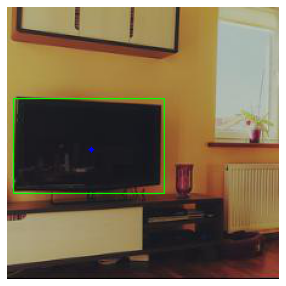

In [ ]:
show_at(tls.train, 1)

In [ ]:
dls = tls.dataloaders(bs = 8)

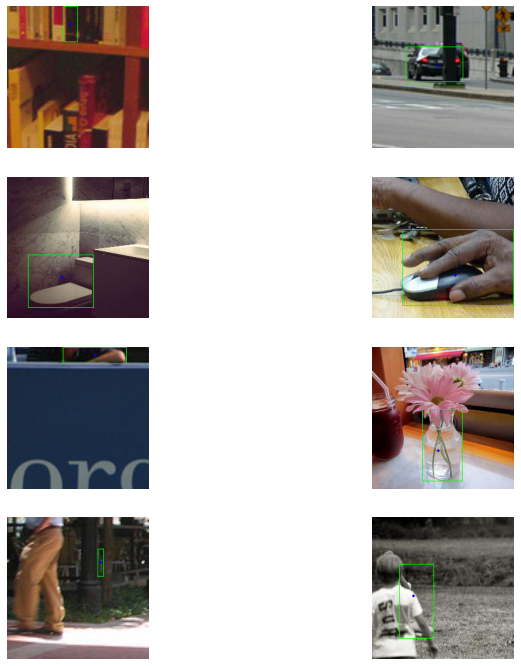

In [ ]:
dls.show_batch()

In [ ]:
coco = COCO(SRC/'instances_val2017.json')

loading annotations into memory...
Done (t=1.15s)
creating index...
index created!


In [ ]:
img_ids = coco.getImgIds()

In [ ]:
annIDs = coco.getAnnIds(imgIds = img_ids[1])

In [ ]:
anns = coco.loadAnns(annIDs)

In [ ]:
img = coco.loadImgs(img_ids[1])[0]
fname = img['file_name']
I = io.imread(SRC/f'{fname}')/255.0

In [ ]:
len(anns)

14

In [ ]:
len(anns[0]['segmentation'][0])

22

In [ ]:
anns[0]

{'segmentation': [[110.39,
   135.78,
   110.39,
   127.62,
   110.01,
   119.6,
   106.87,
   118.47,
   104.37,
   120.1,
   102.49,
   122.73,
   103.74,
   125.49,
   105.24,
   128.88,
   106.87,
   132.39,
   107.38,
   135.78,
   110.39,
   135.65]],
 'area': 88.52115000000006,
 'iscrowd': 0,
 'image_id': 37777,
 'bbox': [102.49, 118.47, 7.9, 17.31],
 'category_id': 64,
 'id': 22328}

In [ ]:
seg_list = anns[0]['segmentation'][0]

In [ ]:
imgs = 0
boxs = 0
masks = 0
for img_id in img_ids:
    ann_ids = coco.getAnnIds(imgIds = img_id)
    anns = coco.loadAnns(annIDs)
    for anno in anns:
        if anno['iscrowd'] == 0:
            if len(anno['segmentation']) > 0:
                masks += 1
            if len(anno['bbox']) > 0:
                boxs += 1
    imgs += 1

In [ ]:
imgs, boxs, masks

(5000, 70000, 70000)

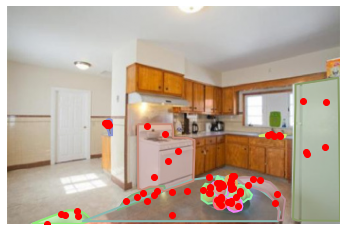

In [ ]:
nps = 5
points = utils.get_prompt_points(anns, nps)
plt.axis('off')
plt.imshow(I)
# img['file_name']
if nps > 1:
    points = np.array(points).reshape(-1,2).tolist()
for pt in points:
    plt.plot(pt[0], pt[1], 'ro')
coco.showAnns(anns)

In [ ]:
np.array(points).reshape(-1,2).tolist()

[[104.24579072470407, 122.7146779386819],
 [106.43790360130117, 119.29794862380017],
 [104.17628887663705, 124.53534229780847],
 [69.51683290764454, 216.8438162754289],
 [54.70020059728332, 220.9350166835794],
 [60.92877185083408, 225.29933117321616],
 [139.49911222652972, 197.2732634506514],
 [153.31331912599944, 196.25455662552037],
 [143.26149720782158, 201.02185991425495],
 [165.75017930131654, 196.83405448790023],
 [222.73041730351957, 181.57720203928113],
 [173.66825212838847, 198.7340724809609],
 [330.9102415694779, 190.0486932462039],
 [322.05730044723003, 87.27877008117684],
 [337.3774809316437, 164.70294586113886],
 [240.21271799845442, 193.18455317616056],
 [238.33220955491106, 190.7128271823691],
 [227.88816559622063, 187.42398445045743],
 [167.37425542345412, 148.22797343303498],
 [164.184749241301, 145.68612593723438],
 [168.50048966829857, 134.55190482205288],
 [275.2267836194175, 136.84580323124487],
 [281.8720470583399, 135.0397052128236],
 [279.7189415302965, 134.9409

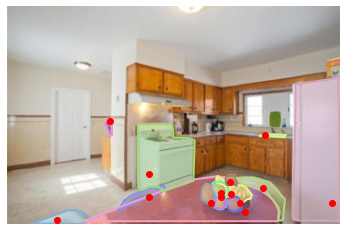

In [ ]:
plt.axis('off')
plt.imshow(I)
# img['file_name']
for pt in ppoints:
    plt.plot(pt[0], pt[1], 'ro')
coco.showAnns(anns)

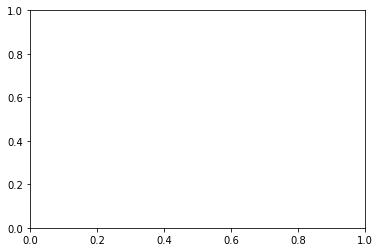

In [ ]:
annos['annotations'][10]

{'segmentation': [[304.09,
   266.18,
   308.95,
   263.56,
   313.06,
   262.81,
   318.3,
   262.81,
   322.04,
   262.81,
   336.25,
   264.68,
   338.87,
   264.68,
   344.85,
   259.07,
   353.83,
   252.34,
   352.7,
   258.32,
   344.1,
   269.17,
   352.33,
   274.4,
   357.94,
   281.88,
   357.94,
   293.1,
   356.07,
   300.58,
   356.44,
   308.06,
   354.57,
   319.28,
   353.45,
   326.01,
   351.96,
   338.73,
   355.32,
   345.08,
   354.95,
   346.21,
   350.09,
   346.21,
   341.86,
   346.21,
   341.11,
   345.46,
   343.73,
   334.24,
   344.85,
   319.65,
   344.48,
   313.3,
   343.73,
   326.01,
   341.86,
   340.6,
   339.62,
   348.82,
   341.49,
   352.94,
   344.1,
   355.56,
   343.36,
   357.42,
   341.11,
   357.8,
   338.49,
   359.67,
   336.25,
   360.79,
   334.75,
   360.79,
   331.01,
   360.79,
   328.77,
   359.67,
   327.27,
   356.68,
   329.14,
   354.43,
   329.14,
   352.56,
   328.02,
   351.44,
   328.77,
   348.45,
   328.77,
   344.34,
   

In [ ]:
temp_dict = json.load(open(DST/'train'/ANNOS))

### Functions

In [ ]:
def get_annotations_cust(fname, prefix=None):
    "Open a COCO style json in `fname` and returns the lists of filenames (with maybe `prefix`) and labelled bboxes."
    annot_dict = json.load(open(fname))
    
    id2images, id2bboxes, id2cntrs, id2cats = ({}, collections.defaultdict(list), collections.defaultdict(list), collections.defaultdict(list))
    ids = []
    classes = {o['id']:o['name'] for o in annot_dict['categories']}
    for anno, img in zip(annot_dict['annotations'], annot_dict['images']):
        bb = anno['bbox']
        imgw, imgh = img['width'], img['height']
        xmin, ymin = (bb[0] - (bb[2]/2))*imgw, (bb[1] - (bb[3]/2))*imgh
        xmax, ymax = xmin + bb[2]*imgw, ymin + bb[3]*imgh
        id2bboxes[anno['image_id']].append([int(xmin), int(ymin), int(xmax), int(ymax)])
        id2cntrs[anno['image_id']].append([int(anno['center'][0]), int(anno['center'][1])])
        id2cats[anno['image_id']].append(classes[anno['category_id']])
        ids.append(anno['image_id'])
    id2images = {o['id']:ifnone(prefix, '') + o['file_name'] for o in annot_dict['images'] if o['id'] in id2bboxes}
    ids = list(id2images.keys())
    return [id2images[k] for k in ids], [id2cntrs[k] for k in ids], [(id2bboxes[k], id2cats[k]) for k in ids], ids
#     return [id2images[k] for k in ids], [id2cntrs[k] for k in ids], [id2bboxes[k] for k in ids]